# Interactias Geo Selected Network

One way of examining the impact of invasive species is to look at all their interactions and the interations those organisms have with each other. This full interaction network gives you a good idea whether a species might be a "keystone" species 

The networks create from all interacting species globally can be misleading, because not all members of the network live in one place. The next step is to filter the species in the network geographically, just to find the interactions that might occur in an area.

I will harvest species interactions data from GLOBI (https://www.globalbioticinteractions.org/) to discover the species that interact with an invasive species.
I will then harvest all the interactions for those species to create two tiers of interactions.
I will then count all the occurences of these in species in GBIF for an area.
I will then create a network diagram to visualize this.

This notebook takes considerable insperation and code from Yikang Li's project on GLoBI (https://curiositydata.org/part1_globi_access/).

In [1]:
import sys
print(sys.version)

#Python 3.7.4 (default, Aug 9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
#pygbif 0.3.0

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pygbif import species
from pygbif import occurrences as occ

### Setting up some parameters

In [3]:
# There is no point accepting all the species that have more than one record.
# There are too many casual records of plants and biirds
thresholdForOccNum = 20

In [4]:
## Define the country of interest
country  = 'BE'

### Define the key taxon for the notebook for which to find all interactions


In [5]:
#taxon = "Oxalis corniculata"
#taxon = "Oxalis pes-caprae"
#taxon = "Abramis brama"
#taxon = "Dikerogammarus villosus" # killer shrimp
#taxon = "Lantanophaga pusillidactyla"
#taxon = "Lantana camara"
#taxon = "Cirsium vulgare"
#taxon = "Solenopsis invicta"
#taxon = "Linepithema humile" #Argentine ant
taxon = "Procyon lotor" # raccoon
#taxon = "Carpobrotus edulis"
#taxon = "not exist"
#taxon = "Sciurus carolinensis" # Eastern grey squirrel

## Load the GLoBI data

The current snapshot of GLoBI was taken on 2019-11-05 from https://depot.globalbioticinteractions.org/snapshot/target/data/tsv/interactions.tsv.gz


In [6]:
# This takes a few minutes to load in.
# the low_memory=False property will get rid of a warning, but will not help if there is really no memory left
data = pd.read_csv('C://Users//quentin//Documents//interactias//interactias//data//interactions.tsv', delimiter='\t', encoding='utf-8', low_memory=False)
len(data)

3878740

In [7]:
# Take a little look at the data to make sure it makes sense
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
3,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
4,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z


## Drop duplicates

This line gets rid of duplicate interations. I currently can't see a reason to keep them, but this perhaps should be checked. 
Some more common interactions might have more support in the literature and therefore more records. Deduplicating them tends to equal out rare interactions with common ones.

In [8]:
data.drop_duplicates(['sourceTaxonName', 'interactionTypeName', 'targetTaxonName'], inplace = True)

In [9]:
## Check how many rows are left
len(data)

1103723

## Remove ranks that are not species
Many entries in GLoBI are non-specific interations at a high taxonomic level. For example, roses are visited by bees.
I have chossen to remove these interactions from the study, at least preliminarly

In [10]:
data.drop(data[data['sourceTaxonRank'] != 'species'].index, inplace = True)
data.drop(data[data['targetTaxonRank'] != 'species'].index, inplace = True)

In [11]:
## Check how many rows are left
len(data)

536018

## Remove "interactsWith"
There are many vague interactions with the term interactsWith. These aren't really that useful, because it could be any kind of interaction, positive or negative, direct or indirect.

In [12]:
data = data[data.interactionTypeName != 'interactsWith']

data = data[data.interactionTypeName != 'visitsFlowersOf']

data = data[data.interactionTypeName != 'pollinates']

len(data)

368895

## Check to see if the taxon exits in GBIF

In [13]:
try:
    #NOTE: The function method name_suggest has a different behavior with regards to the gender of Latin names to name_backbone
    # If name_backbone is given a name in one gender it can still return the best match from the GBIF backbone if that
    # name is spelled as if it was another gender.
    #key = species.name_suggest(q=taxon, limit = 1)
    match = species.name_backbone(name=taxon, limit = 1)
    #print(key)
    
    # if there is no match this is returned form .name_backbone {'confidence': 100, 'matchType': 'NONE', 'synonym': False}
    if match['matchType'] == 'NONE':
        raise ValueError("TAXON NOT FOUND ON GBIF!")
    else:
        key = match['usageKey']
except ValueError as ve:
    print(ve)
    exit(1)




In [14]:

print('The taxon to be studied is ' + match['scientificName'])

The taxon to be studied is Procyon lotor (Linnaeus, 1758)


In [15]:
# What are all the types of interactions involving taxon as source taxon?
data[data['sourceTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'preysOn'], dtype=object)

In [16]:
# What are all the types of interactions involving taxon as target taxon?
data[data['targetTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'pathogenOf', 'ectoParasiteOf', 'hasHost',
       'endoparasiteOf', 'preysOn'], dtype=object)

How many taxon sources do I have?

In [17]:
len(data[data['sourceTaxonName'] == taxon])

88

How many taxon targets do I have?

In [18]:
len(data[data['targetTaxonName'] == taxon])

245

Gather together all the data where the target is the taxon in question.

In [19]:
# What are the columns of this dataset?
data.columns

Index(['sourceTaxonId', 'sourceTaxonIds', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonPathIds',
       'sourceTaxonPathRankNames', 'sourceTaxonSpeciesName',
       'sourceTaxonSpeciesId', 'sourceTaxonGenusName', 'sourceTaxonGenusId',
       'sourceTaxonFamilyName', 'sourceTaxonFamilyId', 'sourceTaxonOrderName',
       'sourceTaxonOrderId', 'sourceTaxonClassName', 'sourceTaxonClassId',
       'sourceTaxonPhylumName', 'sourceTaxonPhylumId',
       'sourceTaxonKingdomName', 'sourceTaxonKingdomId', 'sourceId',
       'sourceOccurrenceId', 'sourceCatalogNumber', 'sourceBasisOfRecordId',
       'sourceBasisOfRecordName', 'sourceLifeStageId', 'sourceLifeStageName',
       'sourceBodyPartId', 'sourceBodyPartName', 'sourcePhysiologicalStateId',
       'sourcePhysiologicalStateName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonIds',
       'targetTaxonName', 'targetTaxonRank', 'targetTaxonPathNames',
       'targetTaxonPath

## Get the primary interation data for the species in question

In [20]:
    interactDataTaxon = data[data['targetTaxonName'] == taxon]
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == taxon])

In [21]:
interactDataTaxon.count()

sourceTaxonId                333
sourceTaxonIds               333
sourceTaxonName              333
sourceTaxonRank              333
sourceTaxonPathNames         333
                            ... 
sourceCitation               333
sourceNamespace              333
sourceArchiveURI             333
sourceDOI                     55
sourceLastSeenAtUnixEpoch    333
Length: 80, dtype: int64

## Get a list of all the primary interacting species

In [22]:
interactingTaxa = pd.DataFrame(interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique())

In [23]:
interactingTaxa

,0
0,Bubo virginianus
1,Cathartes aura
2,Coragyps atratus
3,Aquila chrysaetos
4,Haliaeetus leucocephalus
...,...
289,Cloacitrema michiganense
290,Himasthla rhigedana
291,Parorchis acanthus
292,Pygidiopsoides spindalis


## Get all the secondary interactions

In [24]:
for name in interactingTaxa[0]:
    interactDataTaxon = interactDataTaxon.append(data[data['targetTaxonName'] == name])
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == name])

In [25]:
interactDataTaxon.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
198115,EOL_V2:914958,EOL_V2:914958 | OTT:509853 | ITIS:177884 | IRM...,Bubo virginianus,species,Animalia | Chordata | Aves | Strigiformes | St...,EOL:1 | EOL:694 | EOL:695 | EOL:696 | EOL:8660...,kingdom | phylum | class | order | family | ge...,Bubo virginianus,EOL_V2:914958,Bubo,...,2.209248e+11,https://en.wiktionary.org/wiki/support,"Bosakowski, T., R. Speiser, and D. G. Smith. 1...",NaN,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
209176,EOL_V2:1049010,EOL_V2:1049010 | OTT:9106 | NCBI:43455 | EOL_V...,Cathartes aura,species,Animalia | Chordata | Aves | Accipitriformes |...,EOL:1 | EOL:694 | EOL:695 | EOL:2942901 | EOL:...,kingdom | phylum | class | order | family | ge...,Cathartes aura,EOL_V2:1049010,Cathartes,...,1.681344e+11,https://en.wiktionary.org/wiki/support,"Thiel, R. P. 1976. Activity patterns and food ...",NaN,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
209291,ITIS:175272,ITIS:175272 | OTT:316995 | INAT_TAXON:4765 | I...,Coragyps atratus,species,Animalia | Bilateria | Deuterostomia | Chordat...,ITIS:202423 | ITIS:914154 | ITIS:914156 | ITIS...,kingdom | subkingdom | infrakingdom | phylum |...,Coragyps atratus,ITIS:175272,Coragyps,...,4.232736e+11,https://en.wiktionary.org/wiki/support,"Coleman, J. S. and J. D. Fraser. 1987. Food ha...",NaN,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
214225,EOL_V2:1049119,EOL_V2:1049119 | OTT:263127 | NCBI:8962 | OTT:...,Aquila chrysaetos,species,Animalia | Chordata | Aves | Accipitriformes |...,EOL:1 | EOL:694 | EOL:695 | EOL:2942901 | EOL:...,kingdom | phylum | class | order | family | ge...,Aquila chrysaetos,EOL_V2:1049119,Aquila,...,-6.315840e+10,https://en.wiktionary.org/wiki/support,"Mollhagen, T. R., R. W. Wiley, and R. L. Packa...",10.2307/3799431,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z
216493,EOL_V2:1049121,EOL_V2:1049121 | OTT:1012350 | GBIF:2480446 | ...,Haliaeetus leucocephalus,species,Animalia | Chordata | Aves | Accipitriformes |...,EOL:1 | EOL:694 | EOL:695 | EOL:2942901 | EOL:...,kingdom | phylum | class | order | family | ge...,Haliaeetus leucocephalus,EOL_V2:1049121,Haliaeetus,...,1.577664e+11,https://en.wiktionary.org/wiki/support,"McEwan, L. C. and D. H. Hirth. 1980. Food habi...",10.2307/1367485,NaN,Allen Hurlbert. 2017. Avian Diet Database.,Dryu0003/dietdatabase,https://github.com/Dryu0003/dietdatabase/archi...,NaN,2019-11-03T00:06:25.837Z


In [26]:
interactingTaxa = pd.DataFrame(interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique())

In [27]:
interactingTaxa

,0
0,Bubo virginianus
1,Cathartes aura
2,Coragyps atratus
3,Aquila chrysaetos
4,Haliaeetus leucocephalus
...,...
4240,Nucella lamellosa
4241,Limnodromus scolopaceus
4242,Fundulus persimilis
4243,Fundulus grandissimus


In [28]:
    cleanInteractDataTaxon = interactDataTaxon[['sourceTaxonId', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonFamilyName', 'interactionTypeName',
       'targetTaxonName','targetTaxonRank',
        ]].dropna(subset=['targetTaxonName','sourceTaxonName'])

In [29]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


In [30]:
# How many different sort of interaction do I have left?
# Checking out all the interaction types
cleanInteractDataTaxon['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'pathogenOf', 'ectoParasiteOf', 'hasHost',
       'endoparasiteOf', 'preysOn', 'symbiontOf', 'hasVector',
       'mutualistOf', 'livesInsideOf', 'visits', 'commensalistOf',
       'hasDispersalVector'], dtype=object)

In [31]:
cleanInteractDataTaxon.groupby(cleanInteractDataTaxon['interactionTypeName']).size().sort_values(ascending = False)

interactionTypeName
parasiteOf            4348
eats                  2657
hasHost               2165
preysOn               1181
endoparasiteOf         724
pathogenOf             663
ectoParasiteOf         189
symbiontOf              59
mutualistOf              9
hasVector                3
livesInsideOf            2
visits                   1
hasDispersalVector       1
commensalistOf           1
dtype: int64

In [32]:
len(cleanInteractDataTaxon)

12003

In [33]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


## Create a file with all the nodes and their attributes

In [34]:
# Get the source nodes
nodes = cleanInteractDataTaxon.drop_duplicates(subset=['sourceTaxonName'])

In [35]:
# Get the target nodes
nodes = nodes.append(cleanInteractDataTaxon.drop_duplicates(subset=['targetTaxonName']))

In [36]:
nodes.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


In [37]:
interactingTaxa.count()


0    4244
dtype: int64

### This function takes a name string and checks on GBIF to see if the name exists there.

In [38]:
def speciesExistsInGBIF(name, rank):
    try:
        # Uses the dataset key for the GBIF backbone taxonomy
        #key = species.name_suggest(q=name, rank=rank, datasetKey = "d7dddbf4-2cf0-4f39-9b2a-bb099caae36c", limit = 1)
        match = species.name_backbone(name=name, rank=rank, limit = 1)
        #print(key)

        # if there is no match this is returned from .name_backbone {'confidence': 100, 'matchType': 'NONE', 'synonym': False}
        if match['matchType'] == 'NONE':
            return False
        else:
            return match
    except ValueError as ve:
        print(ve)
        exit(1)

### Check that the species in question is actually found on GBIF

In [39]:
if(speciesExistsInGBIF(taxon, "species") == False):
    print("##### {0} has not been found on GBIF #####".format(taxon))

### Check to see which taxa in the interaction network are found in GBIF and list those ones that are not

In [40]:
taxaNotFound = []
taxaFound = []

print('Taxa from GLoBI, but not found in GBIF')
for name in interactingTaxa.iterrows():
    GBIFName = speciesExistsInGBIF(name[1], "species")
    if GBIFName == False:
        print(name[1][0])
        taxaNotFound.append({'name': name[1][0]})
    else:
        taxaFound.append(GBIFName)
    
    #print(name[1])

# Convert to a Pandas dataframe
taxaFound = pd.DataFrame(taxaFound)

Taxa from GLoBI, but not found in GBIF
Trypanosoma cruzi
Capillaria putorii
Alaria taxideae
Orthopoxvirus
Raccoon-associated polyomavirus 2
Parvovirus
Rabies virus
Canine distemper virus
Feline panleukopenia virus
West virus
Newcastle disease virus
Influenza virus
Salmonella phage Vi II-E1
Salmonella phage ST160
Salmonella phage SEN5
Salmonella phage SEN4
Salmonella phage SEN22
Salmonella phage SEN1
Salmonella phage SE1 (in:P22virus)
Salmonella phage MA12
Salmonella phage BP63
Salmonella phage BP12C
Salmonella phage BP12B
Salmonella phage BP12A
Salmonella phage 64795_sal3
Salmonella phage 118970_sal4
Salmonella phage 118970_sal3
Salmonella phage 118970_sal1
Salmonella phage 103203_sal5
Salmonella phage
Enterobacteria phage
Suffolk virus
Flavivirus
Avian-like circovirus
Staphylococcus phage YMC/09/04/R1988
Staphylococcus phage vB_SauS_phi2
Staphylococcus phage tp310-3
Staphylococcus phage tp310-2
Staphylococcus phage tp310-1
Staphylococcus phage TEM123
Staphylococcus phage StauST398-5
S

Duck faeces associated circular DNA virus 2
Duck faeces associated circular DNA virus 1
Duck astrovirus
Duck associated cyclovirus 1
Duck hepatitis virus
Avian paramyxovirus
Duck parvovirus
Chicken astrovirus
Duck adenovirus
Goose parvovirus
Turkey astrovirus
Eimeria paludosa
Trichomonas batrachorum
Karotomorpha bufonis
Entamoeba ranarum
Bufonid herpesvirus 1
Plasmodium relictum
Sparrow coronavirus HKU17
Plasmodium circumflexum
Fort virus
Leucocytozoon gentili
Trypanosoma bufophlebotomi
Leucocytozoon dubreuili
Capillaria michiganensis
Eptesipox virus
Eptesicus fuscus gammaherpesvirus
Capillaria palmata
Parastrongylus schmidti
Parastrongylus siamensis
Cardiovirus
Black virus
Tamiami virus
Chelonid herpesvirus 5
Rabbit coronavirus HKU14
Mouse
Ficus carica
nan


In [41]:
len(taxaFound)

3886

In [42]:
taxaFound.head(2)

,usageKey,scientificName,canonicalName,rank,status,confidence,matchType,kingdom,phylum,order,...,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,synonym,class,acceptedUsageKey,note
0,5959118,"Bubo virginianus (Gmelin, 1788)",Bubo virginianus,SPECIES,ACCEPTED,98,EXACT,Animalia,Chordata,Strigiformes,...,44.0,212.0,1450.0,9348.0,5959091.0,5959118.0,False,Aves,NaN,NaN
1,2481930,"Cathartes aura (Linnaeus, 1758)",Cathartes aura,SPECIES,ACCEPTED,98,EXACT,Animalia,Chordata,Accipitriformes,...,44.0,212.0,7191147.0,3242141.0,2481927.0,2481930.0,False,Aves,NaN,NaN


### This function takes a GBIF species key and counts how many occurences exist.

In [43]:
def speciesCountInGBIF(key, country):
    count = 0
    try:
        #return occ.count(taxonKey=key, country = country)
        count = occ.count(taxonKey=key, country = country, basisOfRecord = "HUMAN_OBSERVATION")
        count += occ.count(taxonKey=key, country = country, basisOfRecord = "OBSERVATION")
        return count
    except ValueError as ve:
        print(ve)
        exit(1)

### Loop over all the taxa that are in the interaction network and are in GBIF to find the ones that have been found in the country

In [44]:
taxaFoundInCountry = []

for GBIFtaxon in taxaFound.iterrows():
    #print(GBIFtaxon[1]['usageKey'])
    #print('{0} found {1} time in Belgium.'.format(GBIFtaxon,speciesCountInGBIF(GBIFtaxon,country)))
    GBIFOccCount = speciesCountInGBIF(GBIFtaxon[1]['usageKey'],country)
    if GBIFOccCount > thresholdForOccNum: # The threshold for observations is not greater than one, due to all the casual records
        taxaFoundInCountry.append({'key': GBIFtaxon[1]['usageKey'], 'species': GBIFtaxon[1]['canonicalName'], 'count': GBIFOccCount})
        

In [45]:
# Convert to a Pandas dataframe
taxaFoundInCountry = pd.DataFrame(taxaFoundInCountry)    

In [46]:
print("The number of species left in the network is {0}".format(len(taxaFoundInCountry)))

The number of species left in the network is 344


In [47]:
taxaFoundInCountry

,key,species,count
0,2480506,Aquila chrysaetos,21
1,5219243,Vulpes vulpes,41
2,5218786,Procyon lotor,2660
3,2480589,Accipiter gentilis,29263
4,2482077,Podilymbus podiceps,137
...,...,...,...
339,2718307,Bolboschoenus maritimus,6163
340,2865368,Triglochin maritima,1189
341,5301233,Potamogeton nodosus,330
342,5739510,Pungitius pungitius,13509


## Drawing a network of the interactions

Now that I have a list of all the species in the country I can use this as my nodes list for the network diagram.

In [48]:
#networkx seems to be a leading network tool in Python
import networkx as nx
import matplotlib.pyplot as plt

In [49]:
# Create graphic object
G = nx.DiGraph()

In [50]:
# Match colours to interactions to distinguish them on the graph
colorInteractions = {'interaction':['pollinates', 'mutualistOf', 'eats', 'visitsFlowersOf', 'hasHost', 'parasiteOf', 'pathogenOf'],
        'colour':['r', 'g', 'b', 'y', 'm', 'w', 'c']}  

colorInteractionsDf = pd.DataFrame(colorInteractions)

len(list(G.nodes))

0

In [51]:
cleanInteractDataTaxon

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species
...,...,...,...,...,...,...,...
3215754,EOL_V2:474884,Phocitremoides ovale,species,Heterophyidae,hasHost,Nycticorax nycticorax,species
3215938,EOL_V2:474884,Phocitremoides ovale,species,Heterophyidae,parasiteOf,Himasthla rhigedana,species
3216007,EOL_V2:474884,Phocitremoides ovale,species,Heterophyidae,parasiteOf,Mesostephanus appendiculatoides,species
3216065,EOL_V2:474884,Phocitremoides ovale,species,Heterophyidae,parasiteOf,Cloacitrema michiganense,species


## Figure out which node has the most records

In [52]:
maxRecords = taxaFoundInCountry.max()["count"]


## Add the nodes and the edges to the graph

In [53]:
dictOfNodeSizes = {}

# iterate over rows with iterrows()

for index, row in taxaFoundInCountry.iterrows():
     # access data using column names
    #print('A: ', row['species'], row['count'], row['key'])
    G.add_node(row['species'])
    dictOfNodeSizes[row['species']] = int(row['count']/maxRecords*5000)+10

    for edge in cleanInteractDataTaxon.iterrows():
        if row['species'] == edge[1]['sourceTaxonName']:
            #print('B: ', edge[1]['sourceTaxonName'], edge[1]['targetTaxonName'],row['species'])
            for index2, row2 in taxaFoundInCountry.iterrows():
                #print(row2['species'])
                if row2['species'] == edge[1]['targetTaxonName']: 
                    print('C: ', edge[1]['sourceTaxonName'],row2['species'])
                    G.add_edge(edge[1]['sourceTaxonName'], row2['species'], label = edge[1]['interactionTypeName'])


C:  Aquila chrysaetos Procyon lotor
C:  Aquila chrysaetos Phasianus colchicus
C:  Aquila chrysaetos Mergus merganser
C:  Aquila chrysaetos Columba livia
C:  Aquila chrysaetos Gallus gallus
C:  Aquila chrysaetos Anas acuta
C:  Aquila chrysaetos Anas platyrhynchos
C:  Aquila chrysaetos Perdix perdix
C:  Aquila chrysaetos Pica pica
C:  Aquila chrysaetos Felis catus
C:  Aquila chrysaetos Procyon lotor
C:  Aquila chrysaetos Circus cyaneus
C:  Aquila chrysaetos Asio otus
C:  Aquila chrysaetos Asio flammeus
C:  Aquila chrysaetos Larus delawarensis
C:  Aquila chrysaetos Branta canadensis
C:  Aquila chrysaetos Ondatra zibethicus
C:  Aquila chrysaetos Pandion haliaetus
C:  Aquila chrysaetos Callipepla californica
C:  Aquila chrysaetos Corvus corax
C:  Aquila chrysaetos Tyto alba
C:  Aquila chrysaetos Anas cyanoptera
C:  Aquila chrysaetos Eremophila alpestris
C:  Aquila chrysaetos Larus argentatus
C:  Aquila chrysaetos Falco rusticolus
C:  Aquila chrysaetos Chen canagica
C:  Aquila chrysaetos Cyg

C:  Eremophila alpestris Amaranthus albus
C:  Corvus corax Ondatra zibethicus
C:  Corvus corax Anas cyanoptera
C:  Corvus frugilegus Gallinula chloropus
C:  Gallinula chloropus Lemna minor
C:  Gallinula chloropus Ceratophyllum demersum
C:  Gallinula chloropus Cyperus esculentus
C:  Rattus norvegicus Podilymbus podiceps
C:  Anas strepera Ceratophyllum demersum
C:  Anas strepera Myriophyllum spicatum
C:  Anas strepera Ruppia maritima
C:  Anas strepera Zannichellia palustris
C:  Anas strepera Lemna minor
C:  Anas strepera Stuckenia pectinata
C:  Anas strepera Cyperus esculentus
C:  Anas strepera Panicum dichotomiflorum
C:  Meles meles Anas acuta


In [54]:
# iterate over rows with iterrows()
for index, row in taxaFoundInCountry.iterrows():
    for edge in cleanInteractDataTaxon.iterrows():
        if row['species'] == edge[1]['targetTaxonName']:
            #print(edge[1]['sourceTaxonName'], edge[1]['targetTaxonName'],row['species'])
            for index2, row2 in taxaFoundInCountry.iterrows():
                #print(row2['species'])
                if row2['species'] == edge[1]['sourceTaxonName']: 
                    #print(edge[1]['targetTaxonName'],row2['species'])
                    G.add_edge(row2['species'], edge[1]['targetTaxonName'], label = edge[1]['interactionTypeName'])

In [55]:
print("Number of nodes = {0}".format(G.number_of_nodes()))
print("Number of edges = {0}".format(G.number_of_edges()))

Number of nodes = 344
Number of edges = 188


In [56]:
len(dictOfNodeSizes)

344

## Remove any nodes that have no edges.
This happens because some of the linking nodes have few supporting observations and so have been weeded out


In [57]:
for n in list(G.nodes):
    if G.degree(n) == 0:
        G.remove_node(n)

In [58]:
len(G.nodes)

126

## Run through the list of nodes again and construct a list of the node sizes in the correct order

In [59]:
listOfNodeSizes = []

for node in list(G.nodes):
    listOfNodeSizes.append(dictOfNodeSizes[node])

## A network of all the interacting taxa

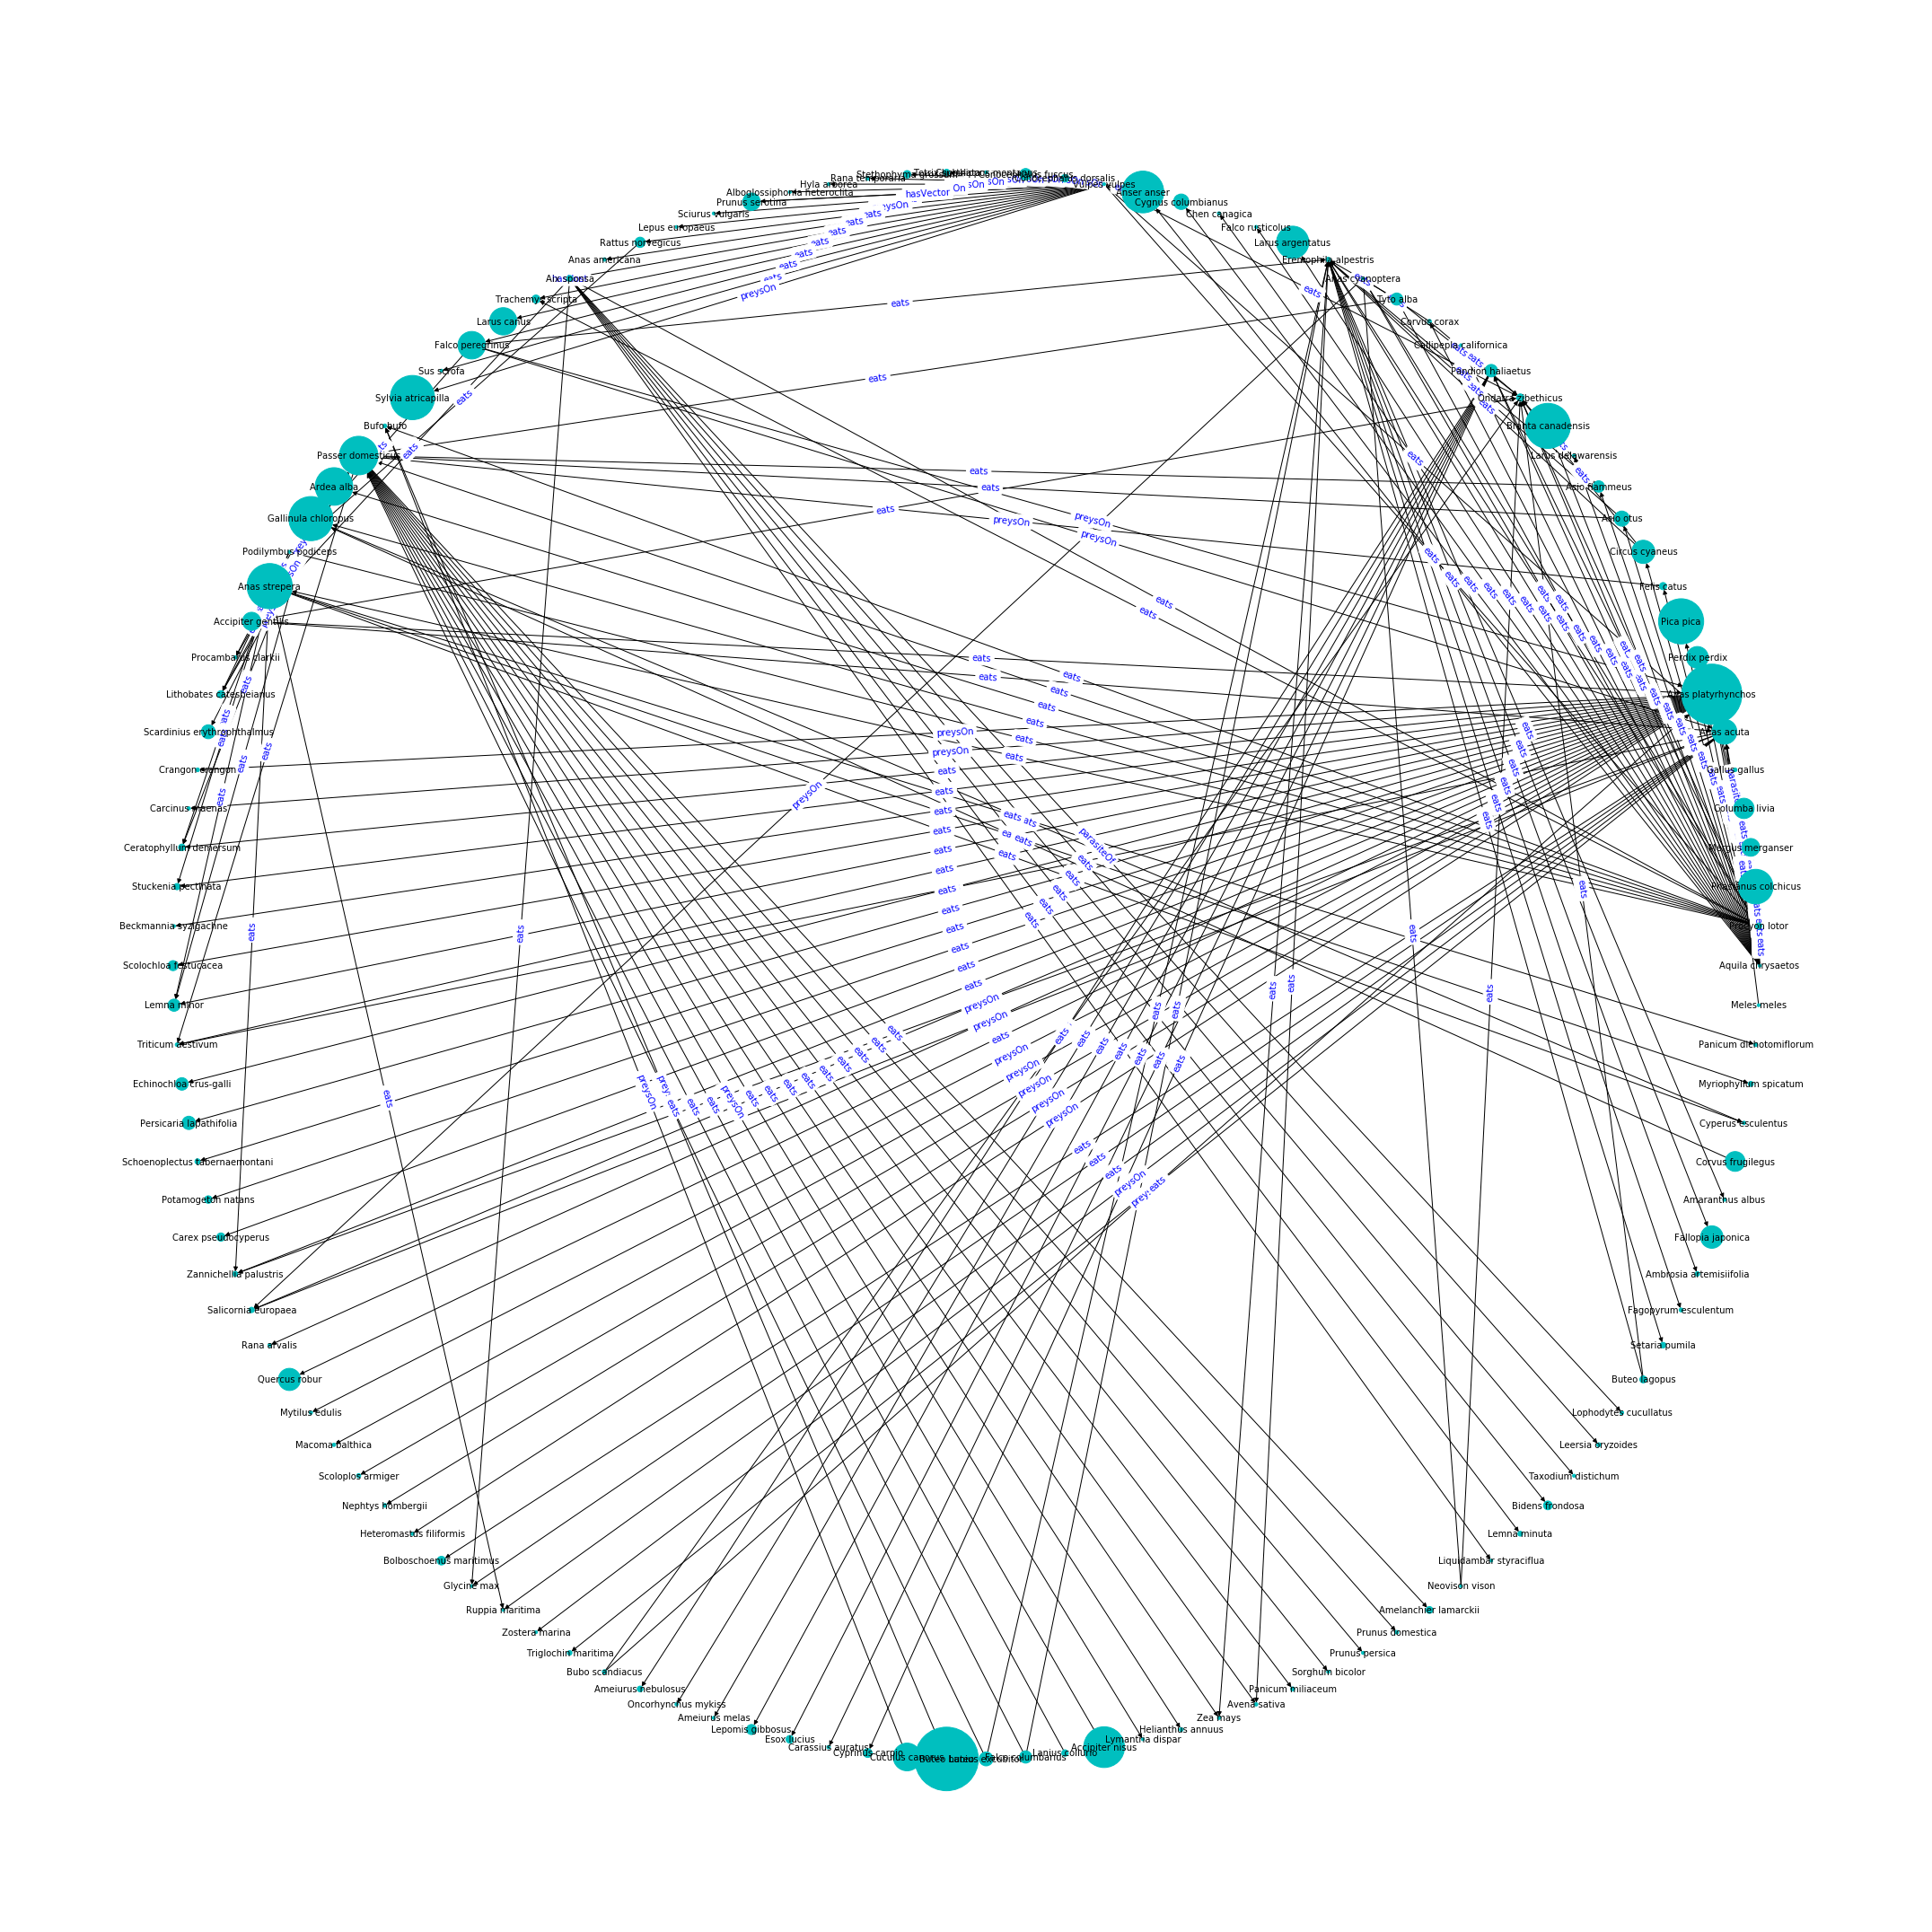

In [62]:
plt.figure(figsize=(30,30))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G, iterations=50, k=50) 
pos = nx.spring_layout(G)
#pos = nx.random_layout(G)
pos = nx.circular_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.shell_layout(G, scale=1)

nodeColors = nx.get_node_attributes(G,'color')

nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=10, font_color='blue')

#nx.draw_networkx_nodes(G, pos, node_color=nodeColors.values())

nx.draw_networkx(G, pos, with_labels=True, node_size = listOfNodeSizes, node_color='c', alpha= 1, arrows=True, 
                    linewidths=1, font_color="black", font_size=10, style = 'dashed')

plt.axis('off')
plt.tight_layout()
plt.show()